In [50]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## 1) Suno Research

In [36]:
with open('../src/crawlers/results/suno-petr4-20220423.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_suno = pd.DataFrame(data)

In [37]:
# Convert date to datetime format
df_suno['date'] = pd.to_datetime(df_suno['date'], format='%d/%m/%Y %H:%M')

# Set date column as index
df_suno.set_index('date', inplace=True)

# Order by date
df_suno.sort_index(inplace=True)

In [38]:
df_suno.sample(5)

,topic,title,url,tags
date,,,,
2020-07-29 09:55:00,Negócios,Agenda do Dia: Vale; Petrobras; Magazine Luiza...,https://www.suno.com.br/noticias/agenda-do-dia...,"[agenda do dia, Cielo (CIEL3), CSN (CSNA3), Ma..."
2021-08-04 15:57:00,Negócios,Bolsonaro volta a falar em vale-gás da Petrobr...,https://www.suno.com.br/noticias/bolsonaro-vol...,"[Agências, gás, Jair Bolsonaro, Petrobras (PET..."
2021-06-15 19:23:00,Negócios,Petrobras (PETR4) receita Ivermectina a funcio...,https://www.suno.com.br/noticias/petrobras-pet...,[Petrobras (PETR4)]
2020-07-30 08:01:00,Negócios,Agenda do Dia: Cogna; Vale; AES Tietê; Petrobr...,https://www.suno.com.br/noticias/agenda-do-dia...,"[AES Tietê (TIET3/TIET4/TIET11), agenda do dia..."
2020-09-22 08:50:00,Negócios,Petrobras (PETR4) finaliza oferta de recompra ...,https://www.suno.com.br/noticias/petrobras-pet...,[Petrobras (PETR4)]


In [39]:
df_suno.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1190 entries, 2020-07-13 09:00:00 to 2022-04-22 11:27:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   topic   1190 non-null   object
 1   title   1190 non-null   object
 2   url     1190 non-null   object
 3   tags    1190 non-null   object
dtypes: object(4)
memory usage: 46.5+ KB


C:\Users\mathe\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


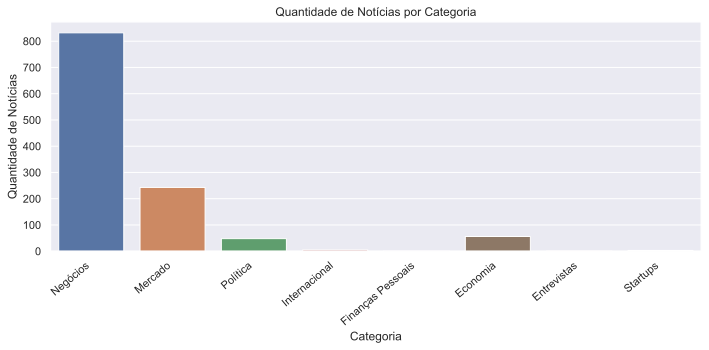

In [40]:
sns.set(style='darkgrid')

plt.figure(figsize=(10, 5))

ax = sns.countplot(df_suno['topic'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.title('Quantidade de Notícias por Categoria')
plt.ylabel('Quantidade de Notícias')
plt.xlabel('Categoria')

plt.tight_layout()
plt.show()

In [41]:
df_suno['topic'].value_counts()

Negócios             832
Mercado              243
Economia              56
Política              48
Internacional          5
Startups               3
Finanças Pessoais      2
Entrevistas            1
Name: topic, dtype: int64

In [42]:
print ('Suno Research')

# Number of news per year
for year in range (2018, 2023):
    
    start_date = '{}-01-01'.format(year)
    end_date = '{}-12-31'.format(year)
    
    print('Notícias em {}: {}'.format(year, df_suno.loc[start_date:end_date].shape[0]))

Suno Research
Notícias em 2018: 0
Notícias em 2019: 0
Notícias em 2020: 292
Notícias em 2021: 712
Notícias em 2022: 186


In [43]:
print (f"Número Máximo de Notícias no Dia: {df_suno.resample('D').topic.count().max()}")
print (f"Número Mínimo de Notícias no Dia: {df_suno.resample('D').topic.count().min()}")
print (f"Número Médio de Notícias no Dia: {df_suno.resample('D').topic.count().mean()}")

Número Máximo de Notícias no Dia: 16
Número Mínimo de Notícias no Dia: 0
Número Médio de Notícias no Dia: 1.8335901386748845


<AxesSubplot:xlabel='date'>

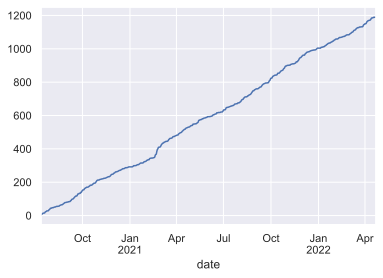

In [44]:
df_suno.resample('D').topic.count().cumsum().plot()

## 2. Twitter

In [38]:
with open('../src/crawlers/twitter/results/infomoney.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_twitter = pd.DataFrame(data)

In [39]:
df_twitter.head()

,tweet_id,created_at,search_dt,text,user_id,screen_name,rt_count,favorite_count
0,1521540488398049280,2022-05-03 14:21:35,2022-05-03 14:37:15,Pesquisas internas mostram crescimento de Lula...,59773459,infomoney,1,9
1,1521536241698811904,2022-05-03 14:04:43,2022-05-03 14:37:15,TSE cancela convite para UE observar eleições ...,59773459,infomoney,0,5
2,1521531884563480576,2022-05-03 13:47:24,2022-05-03 14:37:15,PT começa a estruturar comando da campanha de ...,59773459,infomoney,0,5
3,1521526203231969282,2022-05-03 13:24:50,2022-05-03 14:37:15,"Ministro vê “luta difícil” para Plano Safra, m...",59773459,infomoney,1,4
4,1521521548485668865,2022-05-03 13:06:20,2022-05-03 14:37:15,Amazon Prime: preço da assinatura é reajustado...,59773459,infomoney,0,8


In [40]:
# Convert date to datetime format
df_twitter['created_at'] = pd.to_datetime(df_twitter['created_at'], format='%Y-%m-%d %H:%M:%S')

# Set date column as index
df_twitter.set_index('created_at', inplace=True)

# Order by date
df_twitter.sort_index(inplace=True)

In [41]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3209 entries, 2022-02-02 22:32:23 to 2022-05-03 14:21:35
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        3209 non-null   object
 1   search_dt       3209 non-null   object
 2   text            3209 non-null   object
 3   user_id         3209 non-null   object
 4   screen_name     3209 non-null   object
 5   rt_count        3209 non-null   int64 
 6   favorite_count  3209 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 200.6+ KB


In [44]:
df_twitter.tail()

,tweet_id,search_dt,text,user_id,screen_name,rt_count,favorite_count
created_at,,,,,,,
2022-05-03 13:06:20,1521521548485668865,2022-05-03 14:37:15,Amazon Prime: preço da assinatura é reajustado...,59773459,infomoney,0,8
2022-05-03 13:24:50,1521526203231969282,2022-05-03 14:37:15,"Ministro vê “luta difícil” para Plano Safra, m...",59773459,infomoney,1,4
2022-05-03 13:47:24,1521531884563480576,2022-05-03 14:37:15,PT começa a estruturar comando da campanha de ...,59773459,infomoney,0,5
2022-05-03 14:04:43,1521536241698811904,2022-05-03 14:37:15,TSE cancela convite para UE observar eleições ...,59773459,infomoney,0,5
2022-05-03 14:21:35,1521540488398049280,2022-05-03 14:37:15,Pesquisas internas mostram crescimento de Lula...,59773459,infomoney,1,9


<AxesSubplot:xlabel='created_at'>

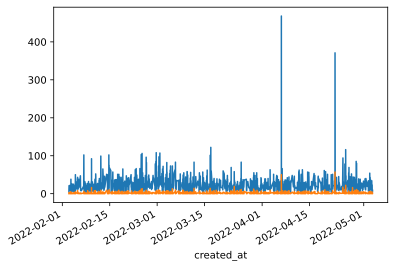

In [43]:
df_twitter.favorite_count.plot()
df_twitter.rt_count.plot()

In [47]:
df_twitter.query('favorite_count == favorite_count.max()')

,tweet_id,search_dt,text,user_id,screen_name,rt_count,favorite_count
created_at,,,,,,,
2022-04-06 16:15:57,1511784797378682892,2022-05-03 14:37:18,Touro futurista em referência ao Bitcoin é ina...,59773459,infomoney,50,468


In [48]:
df_twitter.query('rt_count == rt_count.max()')

,tweet_id,search_dt,text,user_id,screen_name,rt_count,favorite_count
created_at,,,,,,,
2022-04-22 12:36:00,1517527648464949248,2022-05-03 14:37:15,Quanto de Imposto de Renda o vencedor do BBB p...,59773459,infomoney,57,371


---

### Join All Tweets DataFrames

In [55]:
directory = '../src/crawlers/twitter/results'

df_twitter_final = pd.DataFrame()

frames = list()

# Loop over files in the directory
for filename in os.scandir(directory):
    with open(f'../src/crawlers/twitter/results/{filename.name}', encoding='utf8') as json_file:
        data = json.load(json_file)

    df_twitter = pd.DataFrame(data)

    # Convert date to datetime format
    df_twitter['created_at'] = pd.to_datetime(df_twitter['created_at'], format='%Y-%m-%d %H:%M:%S')

    # Set date column as index
    df_twitter.set_index('created_at', inplace=True)

    # Order by date
    df_twitter.sort_index(inplace=True)

    frames.append(df_twitter)

for df in frames:
    df_twitter_final = df_twitter_final.append(df)

In [56]:
df_twitter_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19985 entries, 2021-09-09 16:22:27 to 2022-05-03 14:15:19
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        19985 non-null  object
 1   search_dt       19985 non-null  object
 2   text            19985 non-null  object
 3   user_id         19985 non-null  object
 4   screen_name     19985 non-null  object
 5   rt_count        19985 non-null  int64 
 6   favorite_count  19985 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.2+ MB


In [57]:
df_twitter_final.sample(10)

,tweet_id,search_dt,text,user_id,screen_name,rt_count,favorite_count
created_at,,,,,,,
2022-04-05 09:51:34,1511325672316223492,2022-05-03 14:16:39,Peru impõe toque de recolher para impedir prot...,51150679,leiamoneytimes,0,2
2022-04-15 11:12:53,1514970017842057218,2022-05-03 14:37:16,"R$ 13,9 milhões em créditos da Nota Fiscal Pau...",59773459,infomoney,2,10
2022-04-12 18:09:36,1513987725703143425,2022-05-03 14:16:01,Biden recorrerá ao etanol para reduzir preços ...,49292227,InvestingBrasil,0,4
2020-07-09 16:54:03,1281315702444605441,2022-05-03 14:18:23,No duelo de todo dia hoje o computador ganha f...,45083460,petrobras,34,465
2021-11-18 18:28:27,1461446228802166786,2022-05-03 14:18:13,Prontas para colocar a mão na massa! Uma nova ...,45083460,petrobras,3,18
2022-03-28 09:14:47,1508417316211630088,2022-05-03 14:16:05,Para 75% dos brasileiros culpa por inflação é ...,49292227,InvestingBrasil,2,9
2021-04-06 20:24:19,1379575727952171010,2022-05-03 14:18:17,Estamos abrindo uma nova frente no combate à C...,45083460,petrobras,6,35
2022-02-20 10:08:46,1495384937150746631,2022-05-03 14:37:26,"Robôs, ciência e uma dose de ceticismo: conheç...",59773459,infomoney,0,12
2021-12-21 18:18:36,1473402545871671305,2022-05-03 14:13:41,Braskem (BRKM5) é elevada para grau de investi...,778276232081342464,sunonoticias,1,12


In [60]:
assert len(df_twitter_final.tweet_id.unique()) == df_twitter_final.shape[0]

In [61]:
# Save df object
df_twitter_final.to_pickle('../src/crawlers/twitter/twitter_df.pkl')

---